In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression



In [ ]:
df=pd.read_csv("insurance.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               66 non-null     int64
 1   bought_insurance  66 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


Displaying Top 5 data


In [ ]:
df.head()

,age,bought_insurance
0,18,0
1,19,0
2,20,0
3,21,0
4,22,0


In [ ]:
X=df['age']
Y=df['bought_insurance']

Text(0, 0.5, 'Bought Insurance')

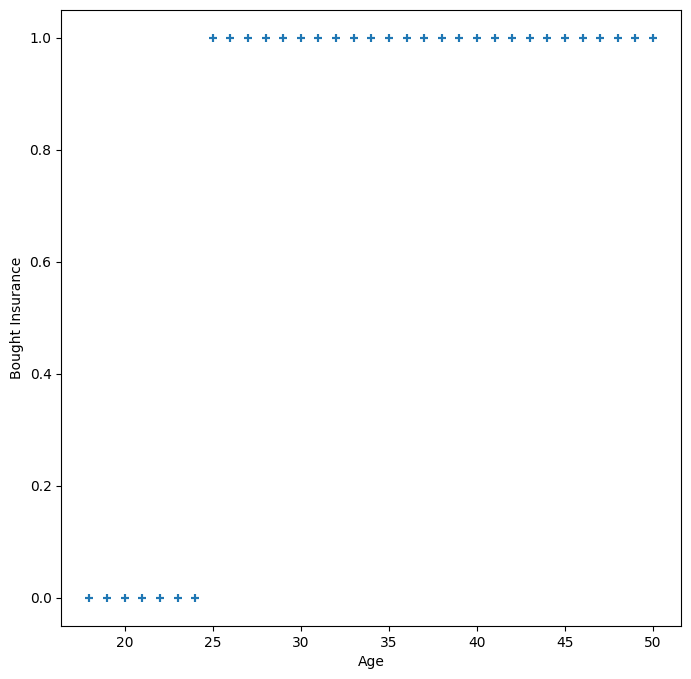

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X,Y ,marker='+')
plt.xlabel("Age")
plt.ylabel("Bought Insurance")

Splitting the data for Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
 

In [ ]:
# X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)   #Column name is assigned in X and Y
X_train,X_test,y_train,y_test=train_test_split(df[['age']],df[['bought_insurance']],train_size=0.8)

In [ ]:
X_test

,age
63,48
46,31
20,38
27,45
44,29
23,41
29,47
8,26
47,32
28,46


In [ ]:
X_train

,age
34,19
42,27
36,21
6,24
49,34
56,41
11,29
33,18
18,36
14,32


In [ ]:
y_train

,bought_insurance
34,0
42,1
36,0
6,0
49,1
56,1
11,1
33,0
18,1
14,1


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

c:\Users\Admin\Desktop\AI lab\venv\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [ ]:
y_predict=model.predict(X_train)

In [ ]:
y_predict

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

Finding the probability 

In [ ]:
model.predict_proba(X_test)

array([[8.21565038e-15, 1.00000000e+00],
       [1.25098615e-04, 9.99874901e-01],
       [8.05868627e-09, 9.99999992e-01],
       [5.19140286e-13, 1.00000000e+00],
       [1.96739833e-03, 9.98032602e-01],
       [1.28855593e-10, 1.00000000e+00],
       [3.28626015e-14, 1.00000000e+00],
       [1.09753629e-01, 8.90246371e-01],
       [3.15190250e-05, 9.99968481e-01],
       [1.30784272e-13, 1.00000000e+00],
       [9.68359279e-01, 3.16407206e-02],
       [8.21565038e-15, 1.00000000e+00],
       [9.97930481e-01, 2.06951890e-03],
       [8.85193043e-01, 1.14806957e-01]])

In [ ]:
model.intercept_

array([-33.75045938])

In [ ]:
model.coef_

array([[1.3786046]])

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def prediction_function(age):
    z = model.coef_[0] * age + model.intercept_[0]
    y = sigmoid(z)
    return y


In [ ]:
age=25

In [ ]:

prediction_function(age)

array([0.67142904])

In [ ]:
w=model.coef_[0]
b=model.intercept_[0]

In [ ]:
#use dataset age value
x=df.age.values
#sigmoid prediction
y_pred= 1 / (1 + np.exp(-(w*x+b)))

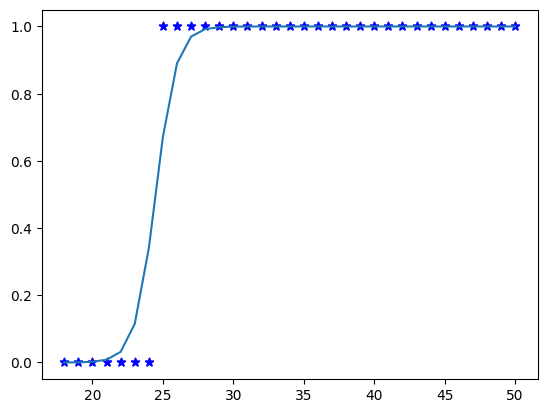

In [ ]:
#sort for smooth curve
idx=np.argsort(x)
#actual data
plt.scatter(df.age,df.bought_insurance,marker="*",color='blue')
plt.plot(x[idx],y_pred[idx])


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix

# correct prediction
y_pred_test = model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)


[[ 3  0]
 [ 0 11]]


<Axes: >

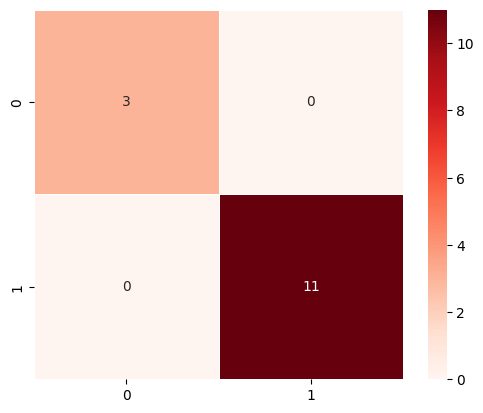

In [ ]:
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    linewidths=.5,
    square = True,
    cmap = 'Reds'
)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)


In [ ]:
precision



1.0

In [ ]:
recall

1.0

In [ ]:
f1

1.0

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test, y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        11

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

